In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [5]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


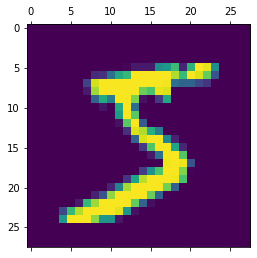

In [6]:
plt.matshow(x_train[0])

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6476 - accuracy: 0.8331 - val_loss: 0.3548 - val_accuracy: 0.9030
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3370 - accuracy: 0.9059 - val_loss: 0.2915 - val_accuracy: 0.9191
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2874 - accuracy: 0.9185 - val_loss: 0.2593 - val_accuracy: 0.9244
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2567 - accuracy: 0.9281 - val_loss: 0.2357 - val_accuracy: 0.9330
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2337 - accuracy: 0.9343 - val_loss: 0.2190 - val_accuracy: 0.9366
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2151 - accuracy: 0.9399 - val_loss: 0.2009 - val_accuracy: 0.9416
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1997 - accuracy: 0.9441 - val_loss: 0.1895 - val_accuracy:

In [13]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1606 - accuracy: 0.9536
Loss=0.161
Accuracy=0.954


<function matplotlib.pyplot.show(close=None, block=None)>

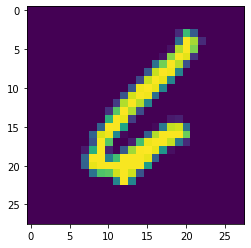

In [14]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [15]:
test_predict=model.predict(x_test)
test_predict_labels=np.argmax(test_predict,axis=1)
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=test_predict_labels)
print('confusion matrix of the test set :\n', confusion_matrix)

313/313 [==============================] - 1s 3ms/step
confusion matrix of the test set :
 tf.Tensor(
[[ 967    0    1    2    0    3    5    1    1    0]
 [   0 1111    4    2    1    1    4    2   10    0]
 [   7    2  981    6    6    1    7   10   11    1]
 [   0    0   12  969    0    7    0   11    9    2]
 [   1    1    5    1  932    0    9    4    5   24]
 [   9    2    1   14    5  836    9    1    9    6]
 [   9    3    4    2    7    9  920    1    3    0]
 [   1    6   19    7    2    1    0  974    3   15]
 [   3    1    4   17    6    9   10   10  909    5]
 [   6    6    2   15   24    4    1    9    5  937]], shape=(10, 10), dtype=int32)
